In [1]:
import sympy
import numpy as np
from scipy.optimize import minimize

In [2]:
from platform import python_version

print(python_version())

3.9.9


In [3]:
# a = 85
# b = -1
# c = 68
# d = -2
# k = 6
# l = 5
# m = 1
# n = 4


a = 80
b = -2
c = 58
d = -1
k = 2
l = 5
m = 3
n = 7

In [4]:
p1 = sympy.Symbol("p1")
p2 = sympy.Symbol("p2")

In [5]:
x = sympy.Symbol("x")

In [6]:
q1 = a + b * p1
q2 = c + d * p2

In [7]:
q1, q2

(80 - 2*p1, 58 - p2)

In [8]:
sympy.solve(q1, p1)

[40]

In [9]:
sympy.solve(q2, p2)

[58]

In [10]:
C = k * (q1 ** 2) + l * q1 * q2 + m * (q2 ** 2) + n
C

3*(58 - p2)**2 + (58 - p2)*(400 - 10*p1) + 2*(80 - 2*p1)**2 + 7

In [11]:
plk = sympy.diff(C, p2)
plk

10*p1 + 6*p2 - 748

In [12]:
plk.subs(p1, 0.5).subs(p2, 0.5)

-740.000000000000

In [13]:
def gr(x):
    q1, q2 = x
    der = np.array([0, 0])
    der[0] = -(2 * (1 / b - k) * q1 - a / b - l * q2)
    der[1] = -(2 * (1 / d - m) * q2 - c / d - l * q1)
    return der

In [14]:
def P(x):
    q1, q2 = x
    p1 = (q1 - a) / b
    p2 = (q2 - c) / d
    C = (k * (q1 ** 2)) + (l * q1 * q2) + (m * (q2 ** 2)) + n
    return -(p1 * q1 + p2 * q2 - C)

In [15]:
q1 = 0.5
q2 = 0.5
x0 = [q1, q2]
res = minimize(P, x0, jac=gr, method='BFGS', options={'disp': True})
res.x

Optimization terminated successfully.
         Current function value: -206.955026
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5


array([1.9238521, 6.1470137])

In [24]:
print('Оптимальные значения q1 q2:', res.x)
print('Максимальная прибыль =',-res.fun)

Оптимальные значения q1 q2: [1.9238521 6.1470137]
Максимальная прибыль = 206.95502555135153


In [16]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

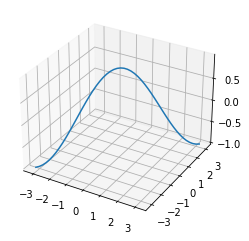

In [17]:
fig = plt.figure(figsize=(4, 4))

x = np.linspace(-np.pi, np.pi, 50)
y = x
z = np.cos(x)

ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

In [18]:
np.linspace(-np.pi, np.pi, 50)

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

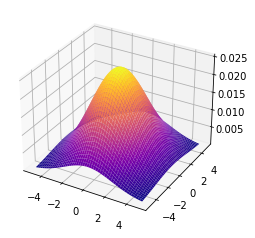

In [19]:
from scipy.stats import multivariate_normal

X = np.linspace(-5, 5, 50)

Y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(X, Y)

X_mean = 0;
Y_mean = 0

X_var = 5;
Y_var = 8

pos = np.empty(X.shape + (2,))

pos[:, :, 0] = X

pos[:, :, 1] = Y

rv = multivariate_normal([X_mean, Y_mean], [[X_var, 0], [0, Y_var]])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, rv.pdf(pos), cmap="plasma")

plt.show()

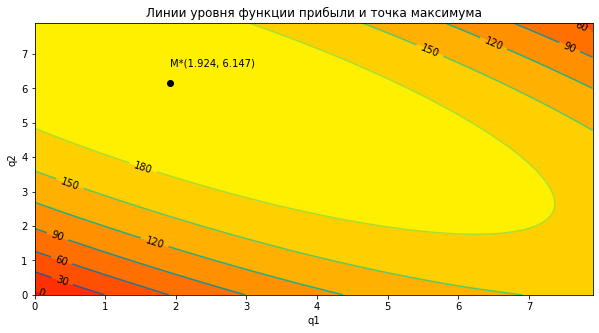

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

u = res.x[0]
v = res.x[1]
X = np.arange(0, 8, 0.1)
Y = np.arange(0, 8, 0.1)
X, Y = np.meshgrid(X, Y)
Z = -P(np.array([X,Y]))

cs = ax.contourf(X, Y, Z, cmap='autumn')
cs_m = ax.contour(X, Y, Z)
ax.plot(u, v, 'ko')
ax.text(u, v+0.5, f'M*({u.round(3)}, {v.round(3)})')
ax.set_title('Линии уровня функции прибыли и точка максимума')
ax.set_xlabel('q1')
ax.set_ylabel('q2')
ax.clabel(cs_m, colors='black')
plt.show()